# Prostate cancer prediction

In this project we will analyze the prostate canecer patient data and will do modeling for prediction. Although we have limited data points (100 patients information) but the models can be utilized for larger dataset.

### Import libraries

We will be using keras library that provide python interface for artificial neural networks. Let's install it.

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn import metrics

### Data loading
Will load data for the exploraory data analyses (EDA)

In [77]:
df = pd.read_csv("F:/Projects/Prostate cancer/Prostate_cancer.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


Here in diagnosis B = Benign tumor, M = Metastatic tumor. Benign tumors are localized and less aggressive than the metastatic tumors.

### Exploratory data analyses 

#### Let's see the concise summary of a DataFrame

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
id                   100 non-null int64
diagnosis_result     100 non-null object
radius               100 non-null int64
texture              100 non-null int64
perimeter            100 non-null int64
area                 100 non-null int64
smoothness           100 non-null float64
compactness          100 non-null float64
symmetry             100 non-null float64
fractal_dimension    100 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


#### Let's calculate some statistical data like percentile, mean and std of the numerical values of the DataFrame

In [79]:
df.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


#### Lets detect missing values

In [80]:
df.isnull()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False


#### Lets see the number of missing values in the data set

In [81]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

#### Let's transpose index and columns of the data frame

In [82]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
diagnosis_result,M,B,M,M,M,B,M,M,M,M,...,B,M,B,B,M,M,B,B,B,M
radius,23,9,21,14,9,25,16,15,19,25,...,23,10,14,10,22,23,22,19,21,16
texture,12,13,27,16,19,25,26,18,24,11,...,27,12,14,17,26,16,14,27,24,27
perimeter,151,133,130,78,135,83,120,90,88,84,...,95,100,85,87,100,132,78,62,74,94


In [85]:
columns = df.columns
columns_new = []
for i in columns:
    columns_new.append(any(df[i].isnull()| df[i].isnull()))
df=df.drop(columns[columns_new],axis=1)
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


#### Let's get the number of unique patients

In [28]:
{'unique patients':len(df.id.unique()), 'records':len(df.id)}

{'unique patients': 100, 'records': 100}

#### Let's draw countplot to see the counts of observation in each categorical bin using bar

M    62
B    38
Name: diagnosis_result, dtype: int64

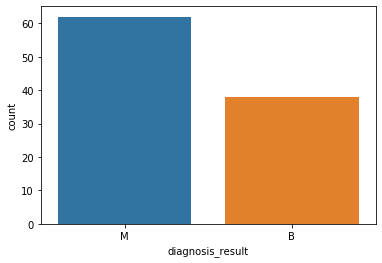

In [86]:
ax = sns.countplot(df.diagnosis_result,label= "count")
df.diagnosis_result.value_counts()

#### Let's plot boxplot and see the data of benign (B) tumors 

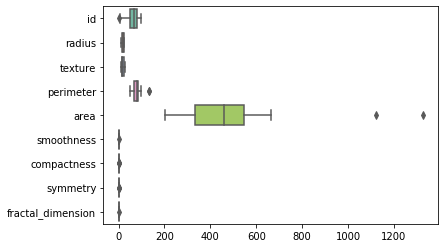

In [97]:
ax=sns.boxplot(palette = "Set2", orient='h', data=df[df.diagnosis_result=='B'])

#### Let's plot boxplot and see the data of malignant (M) tumors 

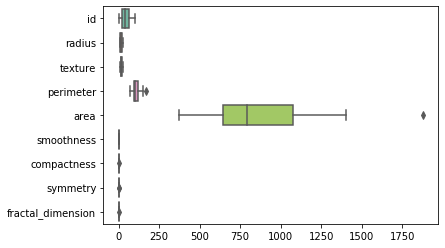

In [98]:
ax=sns.boxplot(palette = "Set2", orient='h', data=df[df.diagnosis_result=='M'])

### Train and test splitting for evaluating the performance of a machine learning algorithm

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['id', 'diagnosis_result'], axis=1),
    df[['diagnosis_result']],
    test_size=0.25,
    random_state=42)

In [100]:
X_train.shape

(75, 8)

### Removing outliers

In [101]:
for column in X_train.columns:
    
    df_train1 = X_train[(y_train.diagnosis_result=='B') & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result=='B',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='B',column]))]
    df_test1 = X_test[(y_test.diagnosis_result=='B') & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result=='B',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='B',column]))]
    
    label_train1 = y_train[(y_train.diagnosis_result=='B') & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result=='B',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='B',column]))]
    label_test1 = y_test[(y_test.diagnosis_result=='B') & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result=='B',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='B',column]))]
    
    df_train2 = X_train[(y_train.diagnosis_result=='M') & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result=='M',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='M',column]))]
    df_test2 = X_test[(y_test.diagnosis_result=='M') & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result=='M',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='M',column]))]
    
    label_train2 = y_train[(y_train.diagnosis_result=='M') & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result=='M',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='M',column]))]
    label_test2 = y_test[(y_test.diagnosis_result=='M') & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result=='M',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='M',column]))]    

In [102]:
X_train=pd.concat([df_train1,df_train2])
y_train=pd.concat([label_train1,label_train2])

X_test=pd.concat([df_test1,df_test2])
y_test=pd.concat([label_test1,label_test2])

X_train.shape

(73, 8)

### Removing correlated features
Correlated features reduces the model performance (accuracy). When you have two independent variables that are highly correlated, you should remove one of them as you run into the multicollinearity conundrum that can lead towider confidence intervals that produce less reliable probabilities in terms of the effect of independent variables in a model.

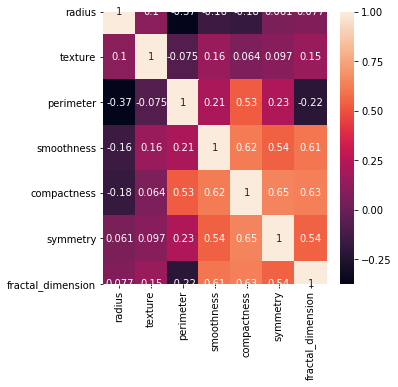

In [111]:
corrMatrix = X_train.corr()
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

In [107]:
correlated_features = set()
for i in range(len(corrMatrix.columns)):
    for k in range(i):
        if abs(corrMatrix.iloc[i, k]) > 0.7:
            colname = corrMatrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'area'}


In [108]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

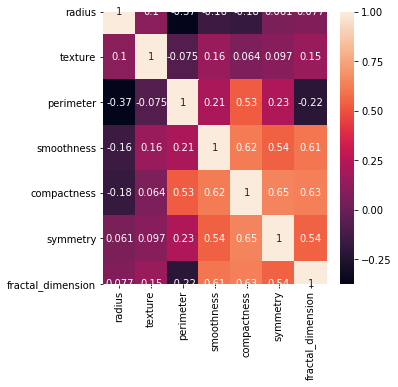

In [112]:
corrMatrix = X_train.corr()
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

### Removing features with 0 variance

If the variance is zero, it means that the feature is constant and will not improve the performance of the model.

In [54]:
constant_filter = VarianceThreshold(threshold=0.0)
constant_filter.fit(X_train)
X_train = constant_filter.transform(X_train)
X_test = constant_filter.transform(X_test)

X_train.shape, X_test.shape

((73, 6), (25, 6))

### Scaling the data

It is a preprocessing of data which will help in normalizing the data within a particular range.

In [113]:
mm_scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(mm_scaler.fit_transform(X_train))
X_test = pd.DataFrame(mm_scaler.transform(X_test))

### Training the model

Learning or determining good values for all the weights and the bias from labeled example.

In [115]:
def conf_matrix(matrix,pred):
    class_names= [0,1]# name  of the classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create a heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

### Random Forest

Used to solve classification and regression problems

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced",n_estimators=200,random_state = 1)
rf.fit(X_train, y_train.values.ravel())
y_pred=rf.predict(X_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 84.00%


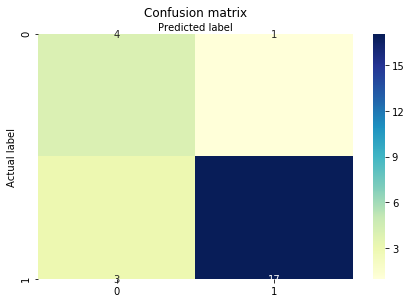

              precision    recall  f1-score   support

           B       0.57      0.80      0.67         5
           M       0.94      0.85      0.89        20

    accuracy                           0.84        25
   macro avg       0.76      0.82      0.78        25
weighted avg       0.87      0.84      0.85        25



In [117]:
# make class predictions with the random forest model
y_pred = rf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

### Naive Bayes

For making a random or constant prediction.

In [118]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())

y_pred=nb.predict(X_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100

print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 80.00%


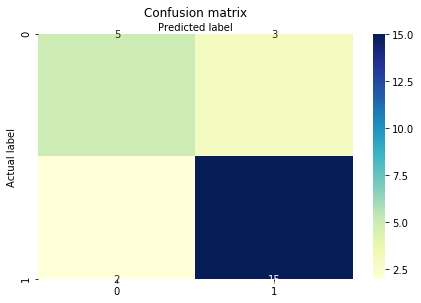

              precision    recall  f1-score   support

           B       0.71      0.62      0.67         8
           M       0.83      0.88      0.86        17

    accuracy                           0.80        25
   macro avg       0.77      0.75      0.76        25
weighted avg       0.80      0.80      0.80        25



In [120]:
# make class predictions with the model
y_pred = nb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate the prediction
report = classification_report(y_pred,y_test)
print(report)

### Support Vector Machine

Support Vector Classifier (SVC) is used to fit the data and return a best fit hyperplane that categorize data.

In [121]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train.values.ravel())

y_pred=svm.predict(X_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 76.00%


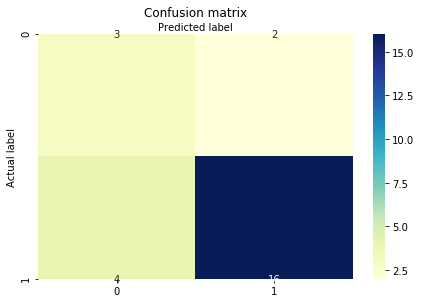

              precision    recall  f1-score   support

           B       0.43      0.60      0.50         5
           M       0.89      0.80      0.84        20

    accuracy                           0.76        25
   macro avg       0.66      0.70      0.67        25
weighted avg       0.80      0.76      0.77        25



In [123]:
# make class predictions with the model
y_pred = svm.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

### KNN

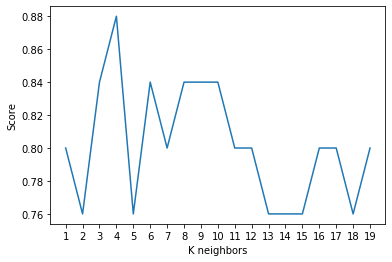

Maximum KNN Score is 88.00%


In [124]:
from sklearn.neighbors import KNeighborsClassifier

# we will try ro find best k value
score = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train, y_train.values.ravel())
    score.append(knn.score(X_test, y_test.values.ravel()))
    
plt.plot(range(1,20), score)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K neighbors")
plt.ylabel("Score")
plt.show()

acc = max(score)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [125]:
knn = KNeighborsClassifier(n_neighbors =11)
knn.fit(X_train, y_train.values.ravel())  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

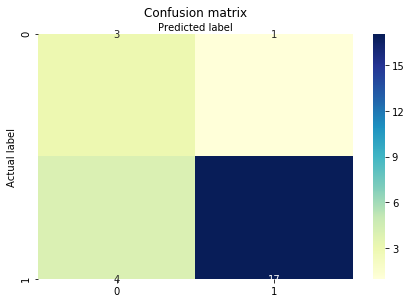

              precision    recall  f1-score   support

           B       0.43      0.75      0.55         4
           M       0.94      0.81      0.87        21

    accuracy                           0.80        25
   macro avg       0.69      0.78      0.71        25
weighted avg       0.86      0.80      0.82        25



In [126]:
# make predictions with the model
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

### Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=50)
logreg.fit(X_train, y_train.values.ravel())
y_pred=logreg.predict(X_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100
print("Test Accuracy of Logistic Regression Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistic Regression Algorithm: 92.00%


C:\Users\\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


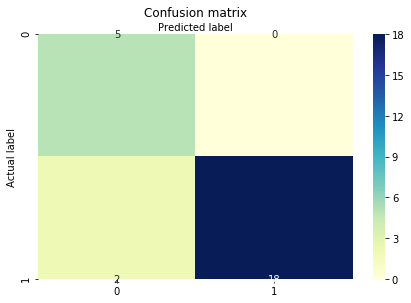

              precision    recall  f1-score   support

           B       0.71      1.00      0.83         5
           M       1.00      0.90      0.95        20

    accuracy                           0.92        25
   macro avg       0.86      0.95      0.89        25
weighted avg       0.94      0.92      0.92        25



In [128]:
# make predictions with the model
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

### Neural Network

In [129]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train.replace({'B':0,'M':1}), epochs=100, batch_size=8)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test.replace({'B':0,'M':1}))

Train on 73 samples
Epoch 1/100
73/73 [==============================] - 0s 7ms/sample - loss: 0.8555 - accuracy: 0.3836
Epoch 2/100
73/73 [==============================] - 0s 396us/sample - loss: 0.8152 - accuracy: 0.3562
Epoch 3/100
73/73 [==============================] - 0s 287us/sample - loss: 0.7855 - accuracy: 0.3836
Epoch 4/100
73/73 [==============================] - 0s 301us/sample - loss: 0.7957 - accuracy: 0.4658
Epoch 5/100
73/73 [==============================] - 0s 287us/sample - loss: 0.7924 - accuracy: 0.4384
Epoch 6/100
73/73 [==============================] - 0s 273us/sample - loss: 0.7252 - accuracy: 0.3836
Epoch 7/100
73/73 [==============================] - 0s 301us/sample - loss: 0.7533 - accuracy: 0.4795
Epoch 8/100
73/73 [==============================] - 0s 301us/sample - loss: 0.7304 - accuracy: 0.5479
Epoch 9/100
73/73 [==============================] - 0s 301us/sample - loss: 0.7257 - accuracy: 0.4521
Epoch 10/100
73/73 [==============================] - 0

73/73 [==============================] - 0s 314us/sample - loss: 0.3264 - accuracy: 0.8630
Epoch 78/100
73/73 [==============================] - 0s 314us/sample - loss: 0.3038 - accuracy: 0.9178
Epoch 79/100
73/73 [==============================] - 0s 273us/sample - loss: 0.2959 - accuracy: 0.9041
Epoch 80/100
73/73 [==============================] - 0s 273us/sample - loss: 0.2999 - accuracy: 0.9315
Epoch 81/100
73/73 [==============================] - 1s 8ms/sample - loss: 0.3128 - accuracy: 0.8904
Epoch 82/100
73/73 [==============================] - 0s 260us/sample - loss: 0.3028 - accuracy: 0.9178
Epoch 83/100
73/73 [==============================] - 0s 273us/sample - loss: 0.3113 - accuracy: 0.9041
Epoch 84/100
73/73 [==============================] - 0s 264us/sample - loss: 0.3115 - accuracy: 0.9041
Epoch 85/100
73/73 [==============================] - 0s 273us/sample - loss: 0.3486 - accuracy: 0.8630
Epoch 86/100
73/73 [==============================] - 0s 260us/sample - loss: 0

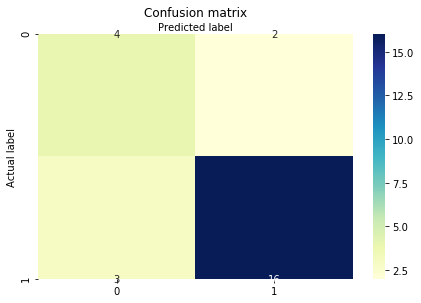

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.89      0.84      0.86        19

    accuracy                           0.80        25
   macro avg       0.73      0.75      0.74        25
weighted avg       0.81      0.80      0.80        25



In [130]:
# make predictions with the model
y_pred = model.predict_classes(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test.replace({'B':0,'M':1}))
conf_matrix(cnf_matrix,y_test)
# calculate
report = classification_report(y_pred,y_test.replace({'B':0,'M':1}))
print(report)

### Ensemble models

In [131]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('lr', logreg), ('rf', knn)],
                         voting='hard')
eclf1 = eclf1.fit(X_train, y_train.values.ravel())
print(eclf1.predict(X_test))
eclf2 = VotingClassifier(estimators=[('lr', logreg), ('rf', knn)],voting='soft')
eclf2 = eclf2.fit(X_train, y_train.values.ravel())
print(eclf2.predict(X_test))

['B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M']
['B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M']


C:\Users\\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### First ensemble

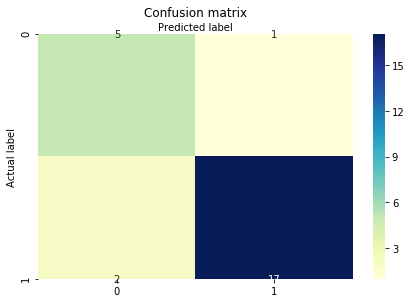

              precision    recall  f1-score   support

           B       0.71      0.83      0.77         6
           M       0.94      0.89      0.92        19

    accuracy                           0.88        25
   macro avg       0.83      0.86      0.84        25
weighted avg       0.89      0.88      0.88        25



In [132]:
# make predictions with the model
y_pred = eclf1.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate
report = classification_report(y_pred,y_test)
print(report)

### Second ensemble

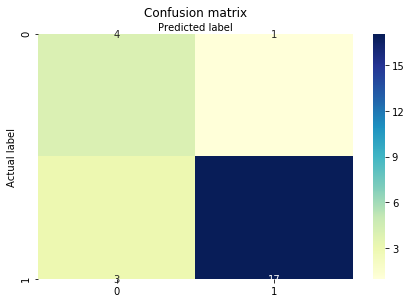

              precision    recall  f1-score   support

           B       0.57      0.80      0.67         5
           M       0.94      0.85      0.89        20

    accuracy                           0.84        25
   macro avg       0.76      0.82      0.78        25
weighted avg       0.87      0.84      0.85        25



In [133]:
# make class predictions with the model
y_pred = eclf2.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate
report = classification_report(y_pred,y_test)
print(report)

### Conclusion
100 data points are low amount of data to work, however it gave a good result for the learning and experimentation. The models can perform better with larger amounts of data.